In [1]:
import scanpy as sc

In [2]:
import pickle

In [3]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [19]:
import sys
import os
from importlib import reload

# Add the path of your package
package_path = os.path.abspath("/Genomics/pritykinlab/tamjeed/github_packages/GlossPath/")
sys.path.insert(0, package_path)
package_path = os.path.abspath("/Genomics/pritykinlab/tamjeed/github_packages/Gloss/")
sys.path.insert(0, package_path)

In [6]:
def generate_pathways_dict(fn, mygenes, change_case = False):
    pathways = {}
    with open(fn, "r") as f:
        for line in f:
            line = line.strip()
            words = line.split("\t")
            if change_case:
                words = [ word.capitalize() for word in words]
            pathway = words[2:]
            pathway = list(set(pathway).intersection(mygenes))
            pathways[words[0]] = pathway
            #if len(pathway) < 200 and len(pathway) > 3:
            #    pathways[words[0]] = pathway
    return pathways

In [7]:
def get_hallmark_pathways(gene_ad):
    hallmark_pathways_path = '../pathway_collections/mouse_hallmark_genes.gmt.txt'
    mygenes = set(gene_ad.var.index)
    path_dict = generate_pathways_dict(hallmark_pathways_path, mygenes)
    return path_dict

def get_kegg_pathways(gene_ad):
    with open('../pathway_collections/kegg_pathways_sep18_2024.pkl', 'rb') as handle:
        kegg_gene_sets = pickle.load(handle)
    
    mygenes = set(gene_ad.var.index)
    for key, value in kegg_gene_sets.items():
        kegg_gene_sets[key] = list(set([gene for gene in value if gene in mygenes]))
        
    empty = []
    for key in kegg_gene_sets:
        if not kegg_gene_sets[key]:
            empty.append(key)

    for pathway in empty:
        kegg_gene_sets.pop(pathway)
        
    path_dict = kegg_gene_sets
    return path_dict

In [279]:
random_neighbors['Jaml']

['Prkar1a', 'Gm1123', 'Mal', 'Cxadr', 'Igbp1', 'Jaml', 'Cd4']

In [280]:
with open('../pathway_computations/cellchatdb.pickle', 'rb') as handle:
    cellchatdb = pickle.load(handle)
with open('../pathway_computations/cd40neighbors_full.pickle', 'rb') as handle:
    cd40neighbors = pickle.load(handle)

In [281]:
with open('../pathway_computations/random_neighbors_full.pickle', 'rb') as handle:
    random_neighbors = pickle.load(handle)

In [282]:
with open('../pathway_computations/humanbase_cd40neighbors.pickle', 'rb') as handle:
    humanbase_cd40neighbors = pickle.load(handle)

In [283]:
with open('../pathway_computations/humanbase_mac_sweep.pickle', 'rb') as handle:
    humanbase_mac_sweep = pickle.load(handle)

In [284]:
with open('../pathway_computations/humanbase_dc_sweep.pickle', 'rb') as handle:
    humanbase_dc_sweep = pickle.load(handle)

In [592]:
with open('../pathway_computations/humanbase_p_sweep.pickle', 'rb') as handle:
    humanbase_p_sweep = pickle.load(handle)

In [436]:
with open('../pathway_computations/from_genesets_nn.pickle', 'rb') as handle:
    from_genesets = pickle.load(handle)

In [437]:
with open('../pathway_computations/to_genesets_nn.pickle', 'rb') as handle:
    to_genesets = pickle.load(handle)

In [516]:
with open('../pathway_computations/cd40_filtered.pickle', 'rb') as handle:
    cd40_filtered_genesets = pickle.load(handle)

In [855]:
with open('../pathway_computations/combined_cellchatdb_nn_signaling.pickle', 'rb') as handle:
    combined_c_n = pickle.load(handle)

In [689]:
### datasets

# uLIPSTIC gut
gut_ad = sc.read_h5ad('datasets/gut_data_aug_11_2024.h5ad')

# uLIPSTIC lcmv sys
lcmv_sys_ad = sc.read_h5ad('datasets/lcmv_sys_data_aug_11_2024.h5ad')
# uLIPSTIC lcmv ln
lcmv_ln_ad = sc.read_h5ad('datasets/lcmv_ln_data_aug_11_2024.h5ad')

# LIPSTIC tumor
l_tumor_ad = sc.read_h5ad('datasets/lipstic_tumor_data_aug_11_2024.h5ad')

In [690]:
datasets = {
    'gut' : gut_ad,
    'lcmv_sys' : lcmv_sys_ad,
    'lcmv_ln' : lcmv_ln_ad,
    'l_tumor' : l_tumor_ad,
}

In [691]:
datasets['l_tumor']

AnnData object with n_obs × n_vars = 10346 × 10898
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.mt.log2', 'nCount_HTO', 'nFeature_HTO', 'nCount_ADT', 'nFeature_ADT', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'hash.ID', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'seurat_clusters', 'Hash', 'Enrichment', 'Ab_Group', 'S.Score', 'G2M.Score', 'Phase', 'Phase2', 'Biotin_Group2', 'Biotin_Ab_Group', 'Lipstic1', 'hash_max', 'hash_id', 'biotin_raw', 'n_counts', 'new_biotin', 'other_new_biotin', 'log_sample_hashtag', 'log_RNA_libsize', 'annotation', 'annotation_fine'
    var: 'name', 'n_counts'
    uns: 'log1p', 'pearson_residuals_normalization'
    obsm: 'X_pca', 'X_umap'
    layers: 'log_lib_norm', 'raw_counts', 'theta_1'

In [692]:
## coefficients

# uLIPSTIC gut
with open('../model_ulipstic_gut/experiment_evaluations/gut_new_gloss_bootstrap_hallmark_oct24_2024.pickle', 'rb') as handle:
    gut_glasso_res = pickle.load(handle)
# uLIPSTIC lcmv sys
with open('../model_ulipstic_lcmv/experiment_evaluations/lcmv_sys_new_gloss_bootstrap_hallmark_oct26_2024.pickle', 'rb') as handle:
    lcmv_sys_glasso_res = pickle.load(handle)
# uLIPSTIC lcmv ln
with open('../model_ulipstic_lcmv/experiment_evaluations/lcmv_ln_new_gloss_bootstrap_hallmark_oct26_2024.pickle', 'rb') as handle:
    lcmv_ln_glasso_res = pickle.load(handle)
# LIPSTIC tumor
with open('../model_lipstic_tumor/experiment_evaluations/tumor_new_gloss_bootstrap_hallmark_oct24_2024.pickle', 'rb') as handle:
    lipstic_tumor_glasso_res = pickle.load(handle)

In [693]:
# ridge lipstic tumor
with open('../model_lipstic_tumor/experiment_evaluations/gloss_ridge_bootstrap_l_tumor_oct23_2024.pickle', 'rb') as handle:
    lipstic_tumor_ridge_res = pickle.load(handle)

In [694]:
# ridge lipstic tumor
with open('../model_ulipstic_gut/experiment_evaluations/gloss_ridge_bootstrap_gut_oct23_2024.pickle', 'rb') as handle:
    gut_ridge_res = pickle.load(handle)

In [695]:
with open('../model_ulipstic_lcmv/experiment_evaluations/gloss_ridge_bootstrap_lcmv_sys_oct23_2024.pickle', 'rb') as handle:
    lcmv_sys_ridge_res = pickle.load(handle)

In [696]:
with open('../model_ulipstic_lcmv/experiment_evaluations/gloss_ridge_bootstrap_lcmv_ln_oct23_2024.pickle', 'rb') as handle:
    lcmv_ln_ridge_res = pickle.load(handle)

In [706]:
coefficient_results = {
    'gut' : gut_glasso_res.response_individual_genes,
    'lcmv_sys' : lcmv_sys_glasso_res.response_individual_genes,
    'lcmv_ln' : lcmv_ln_glasso_res.response_individual_genes,
    'l_tumor' : lipstic_tumor_glasso_res.response_individual_genes
}

In [699]:
ridge_coefficient_results = {
    'l_tumor' : lipstic_tumor_ridge_res,
    'gut' : gut_ridge_res,
    'lcmv_sys' : lcmv_sys_ridge_res,
    'lcmv_ln' : lcmv_ln_ridge_res,
}

In [700]:
resolution_subsets = {

'gut' : {
    'annotation' : ['CD4']
},
'lcmv_ln' : {
    'annot' : ['Cd4']
},
'lcmv_sys' : {
    'annot v2' : ['macrophage']
},
'l_tumor' : {
    'annotation_fine' : ['Mo/MF', 'cDC2', 'mRegDC2']
}

}

In [701]:
def make_corr_df(ad, norm_layer, biotin_norm=False):
    genes = ad.var_names
    spearman_rhos = []
    gene_vals = ad.layers[norm_layer].toarray()
    print(gene_vals.shape)
    if not biotin_norm:
        biotin_vals = ad.obs['new_biotin']
    else:
        biotin_vals = ad.obs['other_new_biotin']
    for i, g in enumerate(genes):
        mygene = gene_vals[:,i]
        spearman_rhos.append(spearmanr(biotin_vals, mygene))
    df = pd.DataFrame({"gene": genes, 
                       "corr": [ c[0] for c in spearman_rhos],
                       "sig": [ c[1] for c in spearman_rhos],
                      })
    
    df["top gene"] = df.gene.isin(
    list(df.sort_values("corr", ascending=False).head(n=10)["gene"]) + 
    list(df.sort_values("corr", ascending=True).head(n=10)["gene"]))
    df["top 30 corr gene"] = df.gene.isin(
    list(df.sort_values("corr", ascending=False).head(n=30)["gene"]))
    df["top 30 anticorr gene"] = df.gene.isin(
    list(df.sort_values("corr", ascending=True).head(n=30)["gene"]))
    df = df.sort_values("corr") 
    df["i"] = [i/10 for i in range(len(genes))]
    
    df['is_FDR_sig'] = multipletests(df['sig'], method='bonferroni', alpha=0.01)[0]
    df['corrected_sig'] = multipletests(df['sig'], method='bonferroni', alpha=0.01)[1]
    df.dropna(inplace=True)
    return df

In [702]:
corr_results = {}

for data in resolution_subsets:
    print(data)
    corr_results[data] = {}
    for resolution in resolution_subsets[data]:
        corr_results[data][resolution] = {}
        for ctype in resolution_subsets[data][resolution]:
            corr_results[data][resolution][ctype] = make_corr_df(datasets[data][datasets[data].obs[resolution] == ctype], norm_layer='log_lib_norm', biotin_norm=True)

gut
(915, 14332)


/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


lcmv_ln
(3547, 11558)


/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


lcmv_sys
(2351, 11558)


/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


l_tumor
(2656, 10898)


/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


(1730, 10898)


/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


(4326, 10898)


/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [703]:
corr_results

{'gut': {'annotation': {'CD4':          gene      corr            sig  top gene  top 30 corr gene  \
   4670   Tmsb10 -0.656070  1.027790e-113      True             False   
   8666     Tcf7 -0.610938   1.023031e-94      True             False   
   8392     Dgka -0.521845   4.763633e-65      True             False   
   10054    Ighm -0.513845   8.498568e-63      True             False   
   2583    Rps20 -0.512105   2.576132e-62      True             False   
   ...       ...       ...            ...       ...               ...   
   10145   Actn2  0.648612  2.373566e-110      True              True   
   10686    Gzma  0.670265  2.179805e-120      True              True   
   9056     Ccl5  0.682623  1.655829e-126      True              True   
   5482     Nkg7  0.703906  8.632821e-138      True              True   
   8924    Itgae  0.707559  7.897143e-140      True              True   
   
          top 30 anticorr gene       i  is_FDR_sig  corrected_sig  
   4670                 

In [932]:
dataset = 'gut'
res = 'annotation'
ctype = 'CD4'

In [886]:
dataset = 'lcmv_sys'
res = 'annot v2'
ctype = 'macrophage'

In [947]:
dataset = 'lcmv_ln'
res = 'annot'
ctype = 'Cd4'

In [788]:
dataset = 'l_tumor'
res = 'annotation_fine'
ctype = 'mRegDC2'

In [948]:
# filter a dict to only include genes in that data

test_ad = datasets[dataset]
coef = coefficient_results[dataset][res][ctype].drop('log', axis=1)
ridgecoef = ridge_coefficient_results[dataset][res][ctype].copy()
corr = corr_results[dataset][res][ctype]

# run the enrichment over correlations or coefficients

,gene,corr,sig,top gene,top 30 corr gene,top 30 anticorr gene,i,is_FDR_sig,corrected_sig
5399,Junb,-0.265484,2.744347e-58,True,False,True,0.0,True,3.171916e-54
5297,Bst2,-0.260451,4.322921e-56,True,False,True,0.1,True,4.996432e-52
2208,Pnrc1,-0.259515,1.094431e-55,True,False,True,0.2,True,1.264944e-51
7738,H3f3b,-0.248135,6.485213e-51,True,False,True,0.3,True,7.495610e-47
2851,Isg15,-0.247128,1.669782e-50,True,False,True,0.4,True,1.929934e-46
...,...,...,...,...,...,...,...,...,...
7076,Tcf7,0.132162,2.722025e-15,True,True,False,1138.0,True,3.146117e-11
407,Ptprc,0.134133,1.040441e-15,True,True,False,1138.1,True,1.202542e-11
3913,Foxp1,0.141073,3.142808e-17,True,True,False,1138.2,True,3.632457e-13
2182,Mmp16,0.164183,7.453126e-23,True,True,False,1138.3,True,8.614323e-19


In [934]:
ridgecoef = ridgecoef.drop(columns=['log_sample_hashtag', 'log_RNA_libsize'])

In [935]:
medians = ridgecoef.median()
sorted_columns = medians.sort_values().index
ridgecoef = ridgecoef[sorted_columns]

In [936]:
#mycoefs = sum_duplicate_features(coef.copy())
#mycoefs.drop('log', axis=1, inplace=True)

In [937]:
ridgecoef.columns[-70:]

Index(['Atp8a2', 'Baiap3', 'Trbv31', 'Rftn1', 'Ccnd2', 'Cd38', 'Ubl5',
       'Aarsd1', 'Prr13', 'Tesk1', 'Rora', 'Mapkapk3', 'Mxd4', 'Map1lc3a',
       'Ctsc', 'Dtx1', 'Runx3', 'Sept8', 'Cap2', 'Selenom', 'Sugt1', 'Trbv1',
       '1110008P14Rik', 'Gm20069', 'H2afj', 'Susd2', 'Dek', 'Cdiptos', 'Cd7',
       'Acap1', 'Klk8', 'Itga1', 'Lpxn', 'Rnf166', 'Trav10n', 'Gzmb', 'Ccl4',
       'Gngt2', 'Acadl', 'AW112010', 'Prrt1', 'Slamf7', 'Cish', 'Fasl',
       'Efhd2', 'Prr5l', 'Cpd', 'Cd96', 'Snai3', 'Hic1', 'Cst7', 'Id2', 'Aim2',
       'Dnah12', 'Litaf', 'Gimap7', 'Trgv2', 'Gzma', 'Apol7e', 'Ccr9', 'Gpr18',
       'Rgs1', 'Abi3', 'Ctsw', 'Jaml', 'Cd160', 'Nkg7', 'Ccl5', 'Itgae',
       'Actn2'],
      dtype='object')

In [950]:
mycoefs = coef 
mycoefs.columns[-90:]

Index(['Rnf31', 'Mrps12', 'Cdk9', 'Tnip2', 'Sipa1l1', 'Scg5', 'Ncor2', 'Dop1a',
       'Hmox2', 'Actn1', 'Tcf7', 'Bhlhe40', 'Nr4a2', 'Egr3', 'Tdrd7', 'Rbck1',
       'Casp7', 'Sbno2', 'Ripk1', 'Pik3cd', 'Mxd1', 'Cd74', 'Ldhb', 'Gbf1',
       'Cmtr1', 'Birc3', 'Cox8a', 'Rbx1', 'Notch2', 'Icam2', 'Riok3', 'Hadh',
       'Myh9', 'Vdac3', 'Gadd45g', 'Fas', 'Sspn', 'Aldh6a1', 'Slc25a3',
       'Ifitm2', 'Gpr183', 'Ncoa4', 'Dlat', 'Grpel1', 'Ptprc', 'Prdx3',
       'Psme2', 'Satb1', 'Mapk14', 'Prdx2', 'Nf2', 'Cdkn1c', 'Gpi1', 'Akt2',
       'Ets1', 'Ldha', 'Phb2', 'Egr1', 'Rela', 'Lysmd2', 'Trim12c', 'Pmepa1',
       'Il6st', 'Arl4a', 'Sgk1', 'Irf2', 'Mov10', 'Slc15a2', 'Bmp2', 'Casp8',
       'Lpar6', 'Bcl6', 'Ly6e', 'Icam1', 'Csf1', 'Il7r', 'B2m', 'Psmb9',
       'Tap1', 'Myc', 'Psma3', 'Zfp36', 'Traf1', 'Jun', 'Helz2', 'Ifi27',
       'Arid5b', 'Ifngr1', 'Bcl3', 'Socs3'],
      dtype='object')

In [939]:
mypathdict = {}
mypathdict.update(cd40neighbors.copy())
mypathdict.update(cellchatdb.copy())
mypathdict.update(humanbase_cd40neighbors.copy())
mypathdict.update(random_neighbors.copy())
mypathdict.update(humanbase_mac_sweep.copy())
mypathdict.update(humanbase_dc_sweep.copy())
mypathdict.update(humanbase_p_sweep.copy())
mypathdict.update(from_genesets.copy())
mypathdict.update(to_genesets.copy())
mypathdict.update(cd40_filtered_genesets.copy())
mypathdict.update(combined_c_n.copy())

for key in mypathdict:
    mypathdict[key] = list(set(mypathdict[key]).intersection(test_ad.var.index))

In [940]:
total_genes = 300

In [941]:
import gseapy as gp

# Define your custom local gene sets as a dictionary
gene_sets = mypathdict

In [942]:
mypathdict.keys()

dict_keys(['cd40_and_neighbors', 'ligands', 'receptors', 'ligrec', 'hb_macrophage_cd40', 'hb_dc_cd40', 'F2rl3', 'Mpdu1', 'C77080', 'Pfdn1', 'Krt78', 'Nol6', 'Akirin1', 'Zfp879', 'Tm4sf20', 'Skp2', 'Jaml', 'Itgae', 'Nkg7', 'Actn2', 'Ccl5', 'Id2', 'Gzma', 'Cd160', 'mac_0.2', 'mac_0.4', 'mac_0.6', 'mac_0.8', 'dc_0.2', 'dc_0.4', 'dc_0.6', 'dc_0.8', 'p_0.2', 'p_0.4', 'p_0.6', 'p_0.8', 'from_Cd40', 'from_Jaml', 'from_Itgae', 'from_Nkg7', 'from_Actn2', 'from_Ccl5', 'from_Id2', 'from_Gzma', 'from_Cd160', 'to_Cd40', 'to_Jaml', 'to_Itgae', 'to_Nkg7', 'to_Actn2', 'to_Ccl5', 'to_Id2', 'to_Gzma', 'to_Cd160', 'cd40_f_in', 'cd40_f_out', 'cd40_f_union', 'cd40_f_intersection', 'combined_c_n'])

In [943]:
pos_coef_dict = {}
pos_corr_dict = {}
pos_rcoef_dict = {}

pos_coef_sig_dict = {}

for key in mypathdict:
    pos_coef_dict[key] = []
    pos_corr_dict[key] = []
    pos_rcoef_dict[key] = []
    pos_coef_sig_dict[key] = []

for i in range(10, 1010, 10):
    total_genes = i
    
    gene_list = list(mycoefs.columns[-total_genes:])

    # Run the Overrepresentation Test using your custom gene sets
    genr = gp.enrichr(gene_list=gene_list, 
                     gene_sets=gene_sets,  # Use the local gene sets
                     outdir=None,
                     organism='Mouse',
                     cutoff=1.0,  # Adjust p-value cutoff as needed
                     background=list(test_ad.var.index)
                    )
    
    overlap_res = dict(zip(genr.results['Term'], genr.results['Overlap']))
    overlap_sig_res = dict(zip(genr.results['Term'], genr.results['P-value']))
    for key in gene_sets:
        if key in overlap_res:
            pos_coef_dict[key].append(int(overlap_res[key].split('/')[0]))
            pos_coef_sig_dict[key].append(overlap_sig_res[key])
        else:
            pos_coef_dict[key].append(0)
            pos_coef_sig_dict[key].append(1.0)
            
    overlap_res

    gene_list = list(corr['gene'][-total_genes:])

    # Run the Overrepresentation Test using your custom gene sets
    cenr = gp.enrichr(gene_list=gene_list, 
                     gene_sets=gene_sets,  # Use the local gene sets
                     outdir=None,
                     organism='Mouse',
                     cutoff=1.0,  # Adjust p-value cutoff as needed
                     background=list(test_ad.var.index)
                    )
    
    overlap_res = dict(zip(cenr.results['Term'], cenr.results['Overlap']))
    for key in gene_sets:
        if key in overlap_res:
            pos_corr_dict[key].append(int(overlap_res[key].split('/')[0]))
        else:
            pos_corr_dict[key].append(0)
    
    gene_list = list(ridgecoef.columns[-total_genes:])

    # Run the Overrepresentation Test using your custom gene sets
    renr = gp.enrichr(gene_list=gene_list, 
                     gene_sets=gene_sets,  # Use the local gene sets
                     outdir=None,
                     organism='Mouse',
                     cutoff=1.0,  # Adjust p-value cutoff as needed
                     background=list(test_ad.var.index)
                    )
    
    overlap_res = dict(zip(renr.results['Term'], renr.results['Overlap']))
    for key in gene_sets:
        if key in overlap_res:
            pos_rcoef_dict[key].append(int(overlap_res[key].split('/')[0]))
        else:
            pos_rcoef_dict[key].append(0)

In [944]:
mypathdict.keys()

dict_keys(['cd40_and_neighbors', 'ligands', 'receptors', 'ligrec', 'hb_macrophage_cd40', 'hb_dc_cd40', 'F2rl3', 'Mpdu1', 'C77080', 'Pfdn1', 'Krt78', 'Nol6', 'Akirin1', 'Zfp879', 'Tm4sf20', 'Skp2', 'Jaml', 'Itgae', 'Nkg7', 'Actn2', 'Ccl5', 'Id2', 'Gzma', 'Cd160', 'mac_0.2', 'mac_0.4', 'mac_0.6', 'mac_0.8', 'dc_0.2', 'dc_0.4', 'dc_0.6', 'dc_0.8', 'p_0.2', 'p_0.4', 'p_0.6', 'p_0.8', 'from_Cd40', 'from_Jaml', 'from_Itgae', 'from_Nkg7', 'from_Actn2', 'from_Ccl5', 'from_Id2', 'from_Gzma', 'from_Cd160', 'to_Cd40', 'to_Jaml', 'to_Itgae', 'to_Nkg7', 'to_Actn2', 'to_Ccl5', 'to_Id2', 'to_Gzma', 'to_Cd160', 'cd40_f_in', 'cd40_f_out', 'cd40_f_union', 'cd40_f_intersection', 'combined_c_n'])

In [945]:
mykey = 'combined_c_n'

In [821]:
for key in humanbase_p_sweep:
    print(key)

p_0.2
p_0.4
p_0.6
p_0.8


In [300]:
from matplotlib.ticker import MaxNLocator

Text(0, 0.5, 'Overlap with Gene Set')

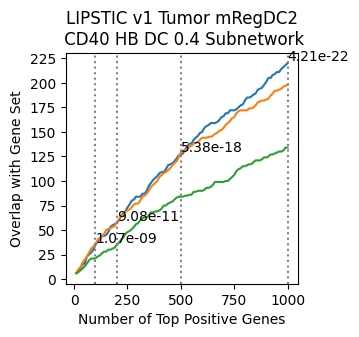

In [806]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
#plt.title('uLIPSTIC Gut CD4 T \n CellChatDB Cell-Cell Contact L-R Genes')
#plt.title('uLIPSTIC Gut CD4 T \n Itgae NicheNet Signaling Subnetwork')
plt.title('LIPSTIC v1 Tumor {}\n CD40 HB DC 0.4 Subnetwork'.format(ctype))
#plt.title('LIPSTIC v1 Tumor Mo/MF \n CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Text(0, 0.5, 'Overlap with Gene Set')

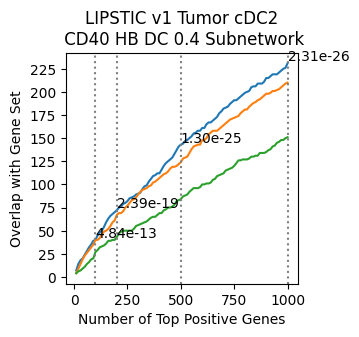

In [772]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
#plt.title('uLIPSTIC Gut CD4 T \n CellChatDB Cell-Cell Contact L-R Genes')
#plt.title('uLIPSTIC Gut CD4 T \n Itgae NicheNet Signaling Subnetwork')
plt.title('LIPSTIC v1 Tumor {}\n CD40 HB DC 0.4 Subnetwork'.format(ctype))
#plt.title('LIPSTIC v1 Tumor Mo/MF \n CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Text(0, 0.5, 'Overlap with Gene Set')

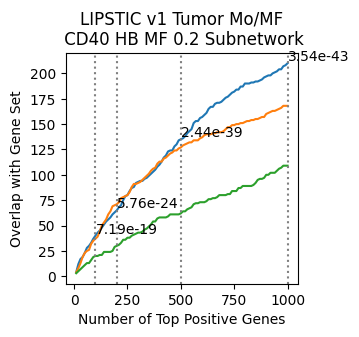

In [755]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
#plt.title('uLIPSTIC Gut CD4 T \n CellChatDB Cell-Cell Contact L-R Genes')
#plt.title('uLIPSTIC Gut CD4 T \n Itgae NicheNet Signaling Subnetwork')
plt.title('LIPSTIC v1 Tumor {}\n CD40 HB MF 0.2 Subnetwork'.format(ctype))
#plt.title('LIPSTIC v1 Tumor Mo/MF \n CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Text(0, 0.5, 'Overlap with Gene Set')

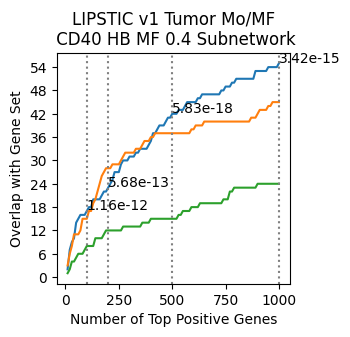

In [787]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
#plt.title('uLIPSTIC Gut CD4 T \n CellChatDB Cell-Cell Contact L-R Genes')
#plt.title('uLIPSTIC Gut CD4 T \n Itgae NicheNet Signaling Subnetwork')
plt.title('LIPSTIC v1 Tumor {}\n CD40 HB MF 0.4 Subnetwork'.format(ctype))
#plt.title('LIPSTIC v1 Tumor Mo/MF \n CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Text(0, 0.5, 'Overlap with Gene Set')

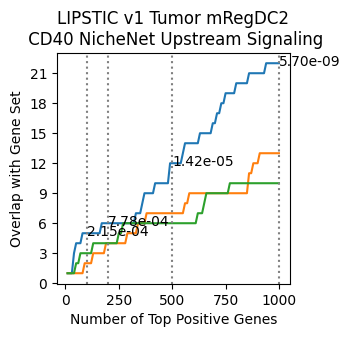

In [804]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
#plt.title('uLIPSTIC Gut CD4 T \n CellChatDB Cell-Cell Contact L-R Genes')
#plt.title('uLIPSTIC Gut CD4 T \n Itgae NicheNet Signaling Subnetwork')
plt.title('LIPSTIC v1 Tumor {}\n CD40 NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor Mo/MF \n CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Text(0, 0.5, 'Overlap with Gene Set')

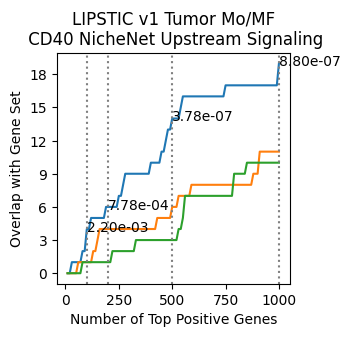

In [752]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
#plt.title('uLIPSTIC Gut CD4 T \n CellChatDB Cell-Cell Contact L-R Genes')
#plt.title('uLIPSTIC Gut CD4 T \n Itgae NicheNet Signaling Subnetwork')
plt.title('LIPSTIC v1 Tumor {}\n CD40 NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor Mo/MF \n CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Text(0, 0.5, 'Overlap with Gene Set')

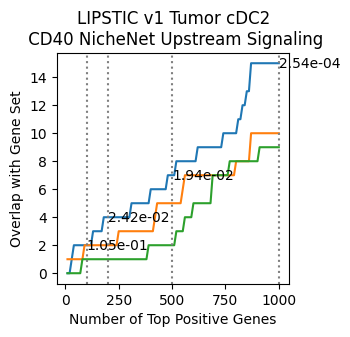

In [770]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
#plt.title('uLIPSTIC Gut CD4 T \n CellChatDB Cell-Cell Contact L-R Genes')
#plt.title('uLIPSTIC Gut CD4 T \n Itgae NicheNet Signaling Subnetwork')
plt.title('LIPSTIC v1 Tumor {}\n CD40 NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor Mo/MF \n CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Text(0, 0.5, 'Overlap with Gene Set')

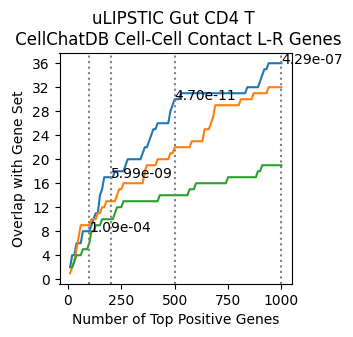

In [824]:
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
plt.title('uLIPSTIC Gut {} T \n CellChatDB Cell-Cell Contact L-R Genes'.format(ctype))
#plt.title('uLIPSTIC Gut {} T \n Itgae NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor mRegDC2 / CD40 NicheNet Signaling Subnetwork')
#plt.title('LIPSTIC v1 Tumor Mo/MF / CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

macrophage


Text(0, 0.5, 'Overlap with Gene Set')

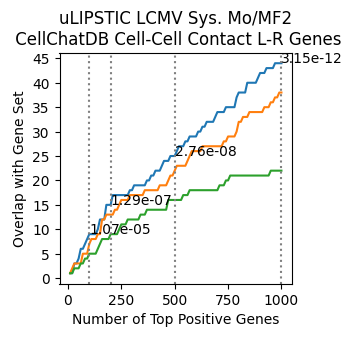

In [839]:
print(ctype)
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
plt.title('uLIPSTIC LCMV Sys. Mo/MF2\n CellChatDB Cell-Cell Contact L-R Genes'.format(ctype))
#plt.title('uLIPSTIC Gut {} T \n Itgae NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor mRegDC2 / CD40 NicheNet Signaling Subnetwork')
#plt.title('LIPSTIC v1 Tumor Mo/MF / CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

CD4


Text(0, 0.5, 'Overlap with Gene Set')

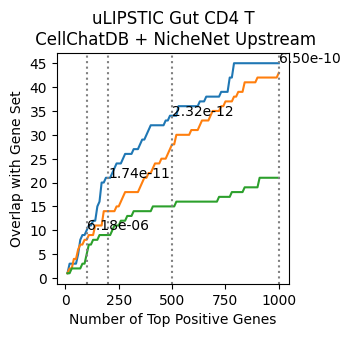

In [946]:
print(ctype)
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
plt.title('uLIPSTIC Gut CD4 T\n CellChatDB + NicheNet Upstream'.format(ctype))
#plt.title('uLIPSTIC Gut {} T \n Itgae NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor mRegDC2 / CD40 NicheNet Signaling Subnetwork')
#plt.title('LIPSTIC v1 Tumor Mo/MF / CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Cd4


Text(0, 0.5, 'Overlap with Gene Set')

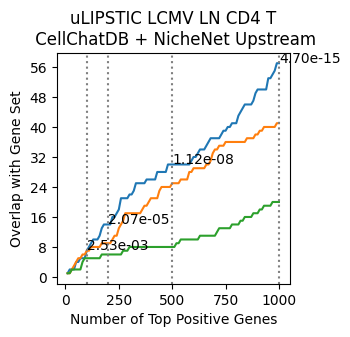

In [931]:
print(ctype)
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
plt.title('uLIPSTIC LCMV LN CD4 T\n CellChatDB + NicheNet Upstream'.format(ctype))
#plt.title('uLIPSTIC Gut {} T \n Itgae NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor mRegDC2 / CD40 NicheNet Signaling Subnetwork')
#plt.title('LIPSTIC v1 Tumor Mo/MF / CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

macrophage


Text(0, 0.5, 'Overlap with Gene Set')

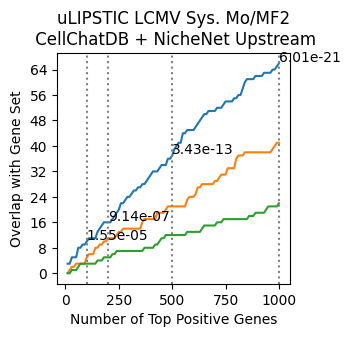

In [901]:
print(ctype)
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
plt.title('uLIPSTIC LCMV Sys. Mo/MF2\n CellChatDB + NicheNet Upstream'.format(ctype))
#plt.title('uLIPSTIC Gut {} T \n Itgae NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor mRegDC2 / CD40 NicheNet Signaling Subnetwork')
#plt.title('LIPSTIC v1 Tumor Mo/MF / CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()

Cd4


Text(0, 0.5, 'Overlap with Gene Set')

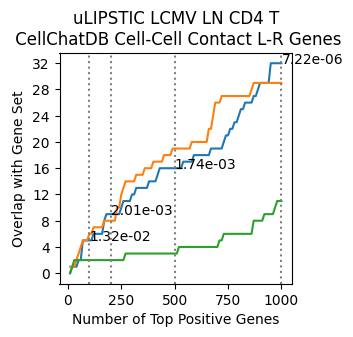

In [854]:
print(ctype)
plt.figure(figsize=(3,3))
plt.plot(list(range(10, 1010, 10)), pos_coef_dict[mykey], label='Gloss Hallmark')
plt.plot(list(range(10, 1010, 10)), pos_corr_dict[mykey], label='Correlations')
plt.plot(list(range(10, 1010, 10)), pos_rcoef_dict[mykey], label='Ridge')
intersects = [100, 200, 500, 1000]
for i, val in enumerate(range(10, 1010, 10)):
    if val in intersects:
        mysig = pos_coef_sig_dict[mykey][i]
        myoverlap = pos_coef_dict[mykey][i]
        plt.axvline(x=val, linestyle=':', color='gray')
        plt.text(val, myoverlap - 0.5, f'{mysig:.2e}', fontsize=10, ha='left', va='bottom')
#plt.title('Top Pos. Gene Overlap w/ {}, {} {}'.format(mykey, dataset, ctype))
plt.title('uLIPSTIC LCMV LN CD4 T\n CellChatDB Cell-Cell Contact L-R Genes'.format(ctype))
#plt.title('uLIPSTIC Gut {} T \n Itgae NicheNet Upstream Signaling'.format(ctype))
#plt.title('LIPSTIC v1 Tumor mRegDC2 / CD40 NicheNet Signaling Subnetwork')
#plt.title('LIPSTIC v1 Tumor Mo/MF / CD40 NicheNet Signaling Subnetwork')
plt.xlabel('Number of Top Positive Genes')
#plt.ylabel('overlap with {} network'.format(mykey))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Overlap with Gene Set'.format(mykey))
#plt.legend()